In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from kret_studies import *
from kret_studies.notebook import *
from kret_studies.complex import *

logger = get_notebook_logger()

Loaded environment variables from /Users/Akseldkw/coding/kretsinger/.env.
/Users/Akseldkw/coding/kretsinger/data/nb_log.log


In [3]:
pd.DataFrame({})

""


In [4]:
Q = np.random.rand(16, 4)

In [5]:
q_detailed = uks_display.q_to_expanded_grid(Q)

In [6]:
q_detailed

col                0                             1                      \
subcol          left               right      left               right   
row subrow                                                               
0   up           NaN  0.373083       NaN       NaN  0.454469       NaN   
            0.030167       NaN  0.288909  0.873650       NaN  0.367082   
    down         NaN  0.041314       NaN       NaN  0.726052       NaN   
1   up           NaN  0.182142       NaN       NaN  0.378015       NaN   
            0.561918       NaN  0.778442  0.691413       NaN  0.454321   
    down         NaN  0.038744       NaN       NaN  0.952398       NaN   
2   up           NaN  0.764445       NaN       NaN  0.599839       NaN   
            0.453008       NaN  0.859191  0.556939       NaN  0.527586   
    down         NaN  0.096827       NaN       NaN  0.177382       NaN   
3   up           NaN  0.195679       NaN       NaN  0.879364       NaN   
            0.256360       NaN  0.802106  0.373282       NaN  0.353608   
    down         NaN  0.393202       NaN       NaN  0.605324       NaN   

col                2                             3                      
subcol          left               right      left               right  
row subrow                                                              
0   up           NaN  0.724983       NaN       NaN  0.134474       NaN  
            0.685519       NaN  0.895041  0.715457       NaN  0.809733  
    down         NaN  0.910704       NaN       NaN  0.635582       NaN  
1   up           NaN  0.857348       NaN       NaN  0.686955       NaN  
            0.422594       NaN  0.622912  0.429200       NaN  0.696100  
    down         NaN  0.565216       NaN       NaN  0.022385       NaN  
2   up           NaN  0.147263       NaN       NaN  0.500517       NaN  
            0.158963       NaN  0.715998  0.194509       NaN  0.075303  
    down         NaN  0.890606       NaN       NaN  0.310172       NaN  
3   up           NaN  0.222891       NaN       NaN  0.844120       NaN  
            0.260328       NaN  0.056930  0.804528       NaN  0.668254  
    down         NaN  0.598313       NaN       NaN  0.338325       NaN

In [7]:
q_styled = uks_display.style_expanded_grid(q_detailed)

In [8]:
q_styled

In [9]:
fig, ax = uks_mpl.subplots(1, 1, width_per=8, height_per=8)

In [10]:
uks_mpl.heatmap_df(q_styled, fmt=".3f", ax=ax)

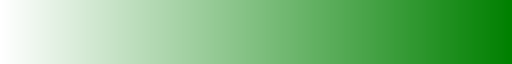

In [11]:
import matplotlib as mpl

mpl.colormaps["WhiteGreen"]

In [12]:
fig, ax = uks_mpl.subplots(1, 1, width_per=8, height_per=8)
uks_display.expanded_heatmap_with_state_borders(q_detailed, ax=ax, cmap="WhiteGreen", fmt=".3f")

<Axes: xlabel='col-subcol', ylabel='row-subrow'>

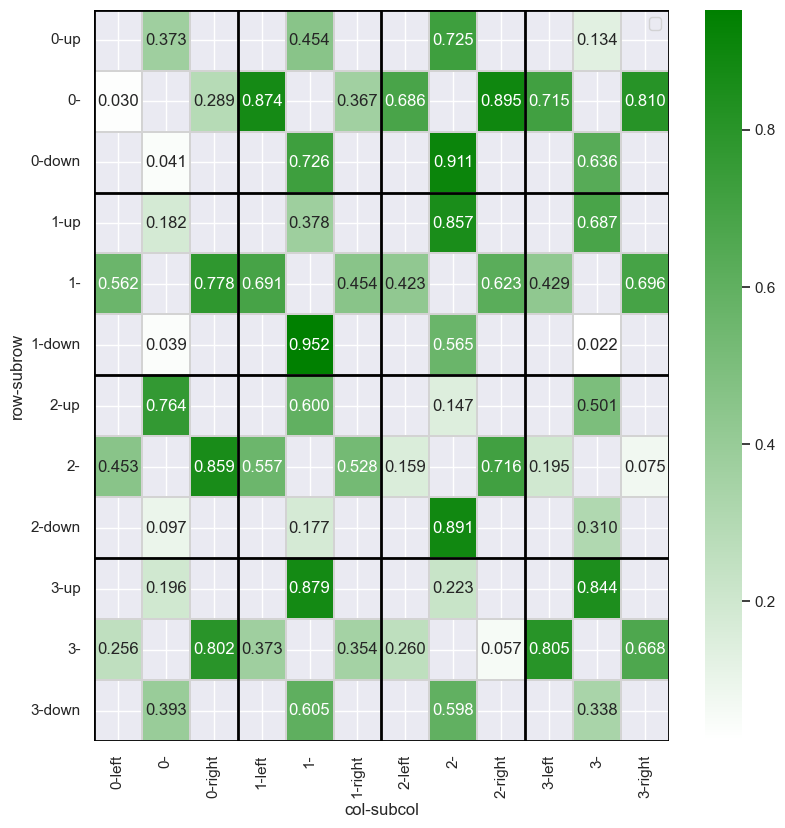

In [13]:
fig

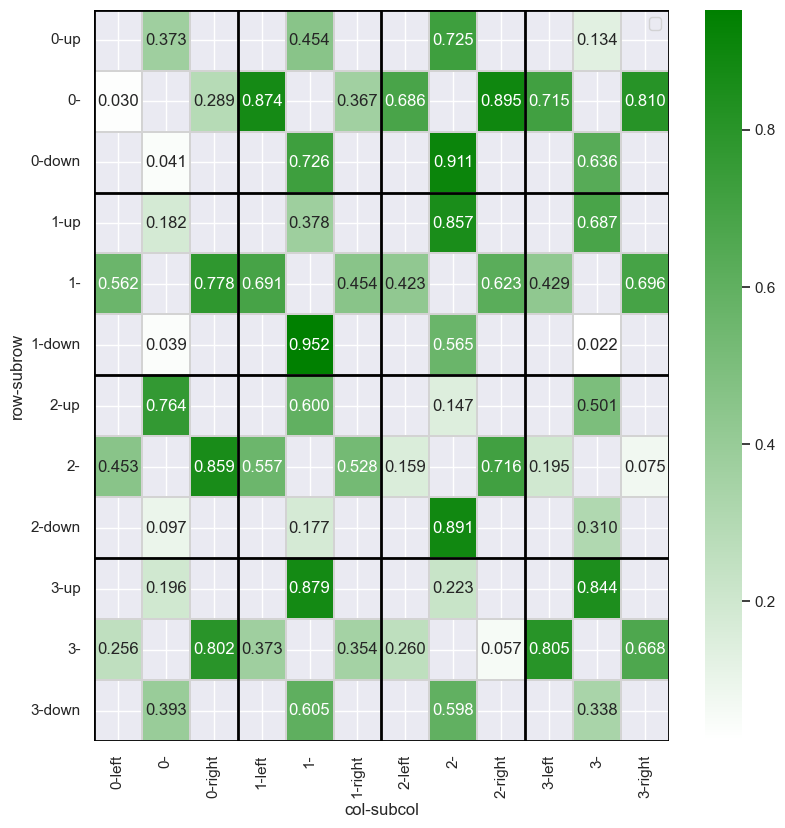

In [14]:
fig